<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=89c58c952703cf1eab2186e25f3f3472607816487d6a08ab4102de58b57d4c77
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [97]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [98]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [99]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [100]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [101]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [102]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [103]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [104]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [105]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,203.459316,8.963270e-01,795.644357,203.304445,6.704587e-01,796.025097,0.978833
1,245.416519,5.268452e+01,701.898961,228.494199,3.388383e+01,737.621974,1.673399
2,203.820292,1.421662e+00,794.758045,203.459156,8.960950e-01,795.644749,1.557274
3,203.068946,3.264443e-01,796.604610,203.035545,2.775981e-01,796.686857,0.545835
4,992.104544,4.432311e+00,3.463145,991.799730,4.583481e+00,3.616788,0.068173
...,...,...,...,...,...,...,...
995,202.845900,-3.516862e-10,797.154100,202.845900,-3.950886e-10,797.154100,1.330231
996,202.845968,9.967887e-05,797.153933,202.845941,6.000558e-05,797.153999,1.707993
997,215.025268,1.697512e+01,767.999613,213.049474,1.433534e+01,772.615181,0.590997
998,866.555686,6.233011e+01,71.114202,822.309821,8.037141e+01,97.318770,0.736477


In [106]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [107]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,7.704739e-04,5.825685e-03,0.998106,5.759695e-04,4.357867e-03,0.998584,0.489245
1,5.347033e-02,3.424235e-01,0.880506,3.221633e-02,2.202391e-01,0.925318,0.837053
2,1.223875e-03,9.240107e-03,0.996994,7.702999e-04,5.824464e-03,0.998107,0.778902
3,2.801548e-04,2.121727e-03,0.999311,2.382100e-04,1.804340e-03,0.999414,0.272419
4,9.913390e-01,2.880784e-02,0.004344,9.909896e-01,2.979185e-02,0.004520,0.033227
...,...,...,...,...,...,...,...
995,1.958433e-13,8.085883e-13,1.000000,1.584843e-13,5.258450e-13,1.000000,0.665209
996,8.546620e-08,6.478668e-07,1.000000,5.145173e-08,3.900291e-07,1.000000,0.854376
997,1.529775e-02,1.103299e-01,0.963427,1.281651e-02,9.317730e-02,0.969216,0.295034
998,8.336449e-01,4.051151e-01,0.089210,7.780966e-01,5.224005e-01,0.122068,0.367884


In [108]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [110]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [111]:
from sklearn.metrics import mean_absolute_error

In [112]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [35]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [36]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [37]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.11083720000000001 for 166 rounds
CV with max_depth=9, min_child_weight=6
[06:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

In [113]:
params['max_depth'] = 10
params['min_child_weight'] = 5

In [78]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [40]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.10919999999999999 for 187 rounds
CV with subsample=1.0, colsample=0.9
[06:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [114]:
params['subsample'] = .7
params['colsample_bytree'] = .9

In [43]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
CV with eta=0.3
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3.06 s, sys: 47.9 ms, total: 3.11 s
Wall time: 1.59 s
	MAE 0.1066426 for 130 rounds

CV with eta=0.2
[06:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:49] WARNING: /workspace/src/object

In [115]:
params['eta'] = .1

In [116]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[06:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.282735
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.26825
[2]	Test-rmse:0.255928
[3]	Test-rmse:0.244932
[4]	Test-rmse:0.234835
[5]	Test-rmse:0.225603
[6]	Test-rmse:0.21837
[7]	Test-rmse:0.21213
[8]	Test-rmse:0.205578
[9]	Test-rmse:0.198746
[10]	Test-rmse:0.194105
[11]	Test-rmse:0.189689
[12]	Test-rmse:0.185838
[13]	Test-rmse:0.183668
[14]	Test-rmse:0.180422
[15]	Test-rmse:0.177555
[16]	Test-rmse:0.174138
[17]	Test-rmse:0.172181
[18]	Test-rmse:0.171874
[19]	Test-rmse:0.17014
[20]	Test-rmse:0.168657
[21]	Test-rmse:0.167178
[22]	Test-rmse:0.165659
[23]	Test-rmse:0.164887
[24]	Test-rmse:0.163399
[25]	Test-rmse:0.161496
[26]	Test-rmse:0.16051
[27]	Test-rmse:0.159245
[28]	Test-rmse:0.158395
[29]	Test-rmse:0.157488
[30]	Test-rmse:0.155986
[31]	Test-rmse:0.156423
[32]	Test-rmse:0.155131
[33]	Test-rmse:0.155239
[34]	Test-rmse:

In [118]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[06:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.282735
[1]	Test-rmse:0.26825
[2]	Test-rmse:0.255928
[3]	Test-rmse:0.244932
[4]	Test-rmse:0.234835
[5]	Test-rmse:0.225603
[6]	Test-rmse:0.21837
[7]	Test-rmse:0.21213
[8]	Test-rmse:0.205578
[9]	Test-rmse:0.198746
[10]	Test-rmse:0.194105
[11]	Test-rmse:0.189689
[12]	Test-rmse:0.185838
[13]	Test-rmse:0.183668
[14]	Test-rmse:0.180422
[15]	Test-rmse:0.177555
[16]	Test-rmse:0.174138
[17]	Test-rmse:0.172181
[18]	Test-rmse:0.171874
[19]	Test-rmse:0.17014
[20]	Test-rmse:0.168657
[21]	Test-rmse:0.167178
[22]	Test-rmse:0.165659
[23]	Test-rmse:0.164887
[24]	Test-rmse:0.163399
[25]	Test-rmse:0.161496
[26]	Test-rmse:0.16051
[27]	Test-rmse:0.159245
[28]	Test-rmse:0.158395
[29]	Test-rmse:0.157488
[30]	Test-rmse:0.155986
[31]	Test-rmse:0.156423
[32]	Test-rmse:0.155131
[33]	Test-rmse:0.155239
[34]	Test-rmse:0.153657
[35]	Test-rmse:0.152603
[36]	Test-rmse:0.151414


In [119]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.0816208399102782

In [120]:
best_model.save_model("my_model.model")

In [121]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[06:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


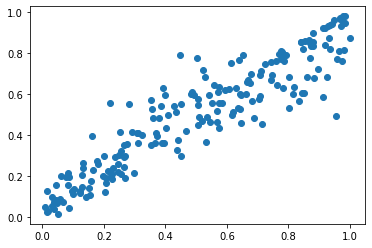

In [122]:
plt.scatter(y_test,p)

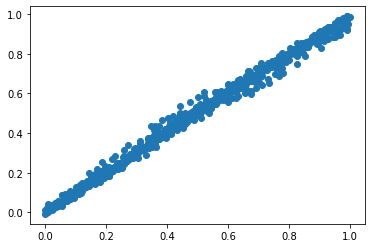

In [123]:
plt.scatter(y_train,q)

In [124]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, p))
r2_test = r2_score(y_test, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.022720587565038516
R2 score of training set is 0.9938544622343194


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.11460451357622446
R2 score of test set is 0.8539816936885003
